## FINAL CHALLENGE: KIWI INSPECTION

In [18]:
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load pics
dirname = "final challenge/"
NIR_img_names = [dirname + "C0_00000" + str(i) + ".png" for i in range(6,10)]
NIR_img_names.append(dirname + "C0_000010.png")
Col_img_names = [dirname + "C1_00000" + str(i) + ".png" for i in range(6,10)]
Col_img_names.append(dirname + "C1_000010.png")

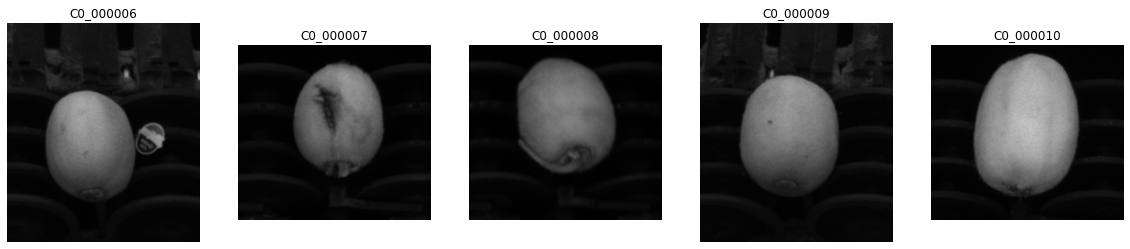

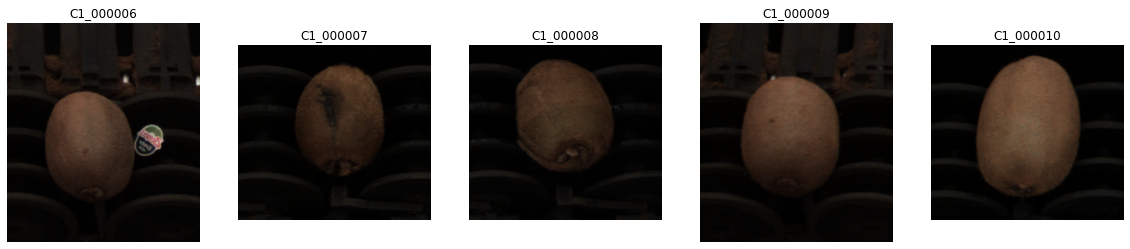

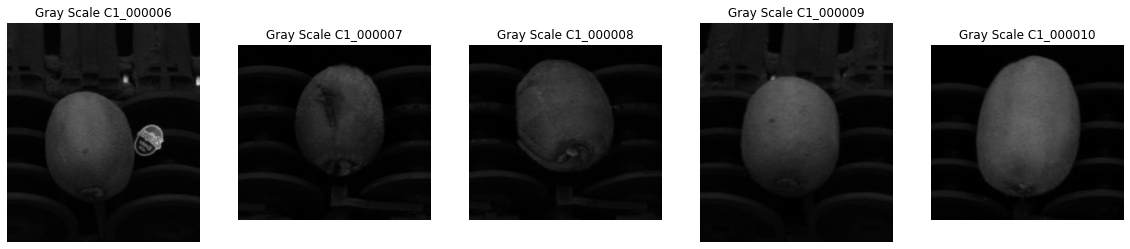

In [19]:
# Loading of Infarared Images
img_NIR = []
img_NIR_RGB = []
j = 0
plt.figure(figsize=(20,5))
for i in NIR_img_names:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img_NIR.append(img)

    img_c = cv2.imread(i)
    img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)
    img_NIR_RGB.append(img_c)

    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("C0_000010")
    else:
        plt.title("C0_00000{}".format(j+6))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    j = j+1
plt.show()

# Loading of Colored Images
img_gray = []
img_RGB = []
j = 0
plt.figure(figsize=(20,5))
for i in Col_img_names:
    img_BGR = cv2.imread(i)
    rgb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    img_RGB.append(rgb)
    gray = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
    img_gray.append(gray)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("C1_000010")
    else:
        plt.title("C1_00000{}".format(j+6))
    plt.imshow(rgb)
    j = j+1   
plt.show()

j = 0
plt.figure(figsize=(20,5))
for i in Col_img_names:
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Gray Scale C1_000010")
    else:
        plt.title("Gray Scale C1_00000{}".format(j+6))
    plt.imshow(img_gray[j], cmap='gray', vmin=0, vmax=255) 
    j = j+1   

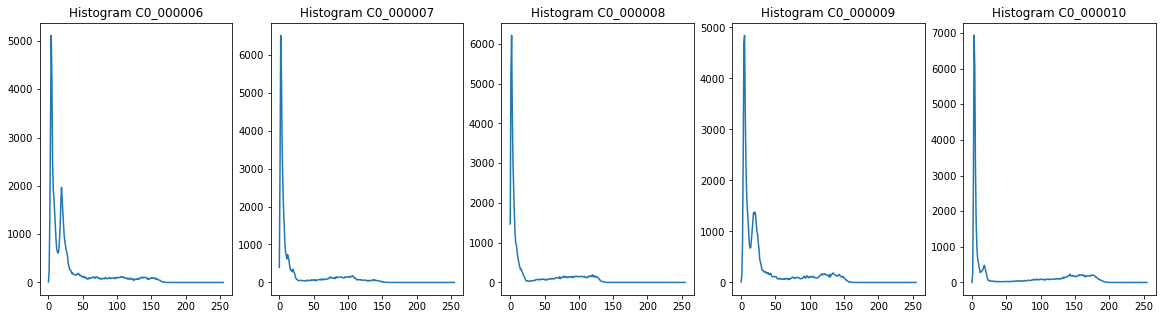

In [20]:
#Histogram plotting
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:
    hist, bins = np.histogram(i.flatten(),256,[0,256])
    plt.subplot(1,5,j+1)
    if j==4:
        plt.title("Histogram C0_000010")
    else:
        plt.title("Histogram C0_00000{}".format(j+6))
    plt.plot(hist)
    j = j+1
plt.show()

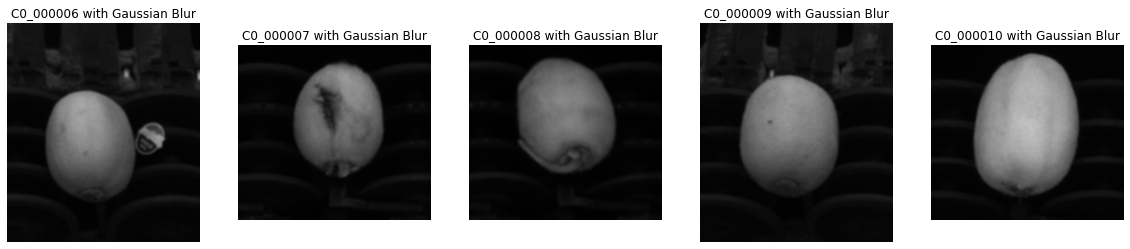

In [21]:
#Application of a Gaussian Blur
blur = []
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:
    blur_temp = cv2.GaussianBlur(i,(3,3),0)
    blur.append(blur_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("C0_000010 with Gaussian Blur")
    else:
        plt.title("C0_00000{} with Gaussian Blur".format(j+6))
    plt.imshow(blur[j], cmap='gray', vmin=0, vmax=255)
    j = j+1

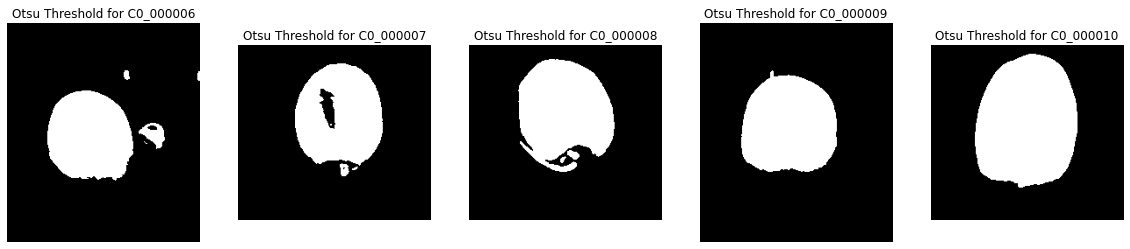

In [22]:
#Otsu Thresholding to segment the image
otsu = []
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:
    th, otsu_temp = cv2.threshold(blur[j], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
    otsu.append(otsu_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Otsu Threshold for C0_000010")
    else:
        plt.title("Otsu Threshold for C0_00000{}".format(j+6))
    plt.imshow(otsu[j] ,cmap='gray', vmin=0, vmax=255)
    j = j+1
plt.show()

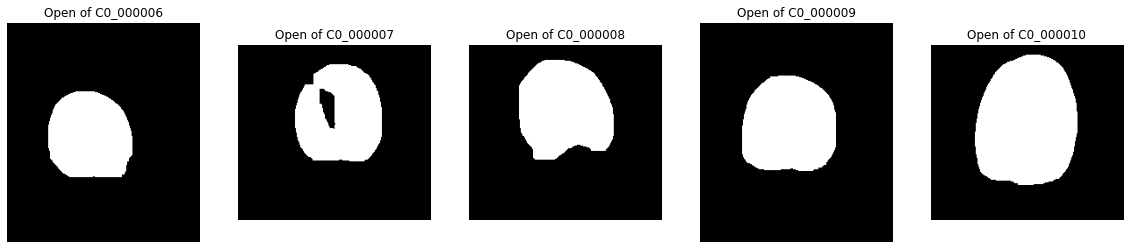

In [23]:
open_def=[]

open_ker=cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:  
    open_def_temp=cv2.morphologyEx(otsu[j], cv2.MORPH_OPEN, open_ker)
    open_def.append(open_def_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Open of C0_000010")
    else:
        plt.title("Open of C0_00000{}".format(j+6))
    plt.imshow(open_def[j], cmap='gray', vmin=0, vmax=255)
    j = j+1

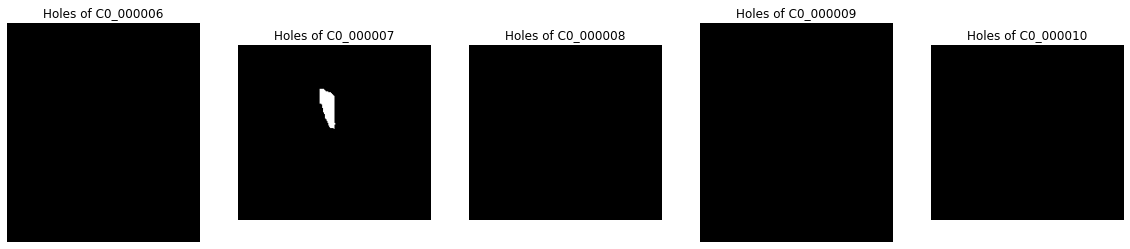

In [24]:
#filling of the holes inside the fruit blob using a flood-fill approach
holes = []
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:
    h, w = open_def[j].shape[:2]
    m1 = np.zeros((h+2, w+2), np.uint8)
    ff1 = open_def[j].copy()
    cv2.floodFill(ff1, m1, (0,0), 255)
    holes_temp = cv2.bitwise_not(ff1)
    holes.append(holes_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Holes of C0_000010")
    else:
        plt.title("Holes of C0_00000{}".format(j+6))
    plt.imshow(holes[j], cmap='gray', vmin=0, vmax=255)
    j = j+1

In [25]:
#Count the number of defects for each image
n_blobs = []
j = 0

for i in holes: 
    cnts = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    n_blobs_temp = 0
    for c in cnts:
        #area = cv2.contourArea(c)
        #cv2.drawContours(mask[j], [c], -1, (36,255,12), -1)
        n_blobs_temp += 1
    n_blobs.append(n_blobs_temp)

    if n_blobs[j] > 0:
        #Print only if at least one defect is found
        print("Number of defects in C0_00000{}: ".format(j+6) + str(n_blobs[j]))

    j = j+1

Number of defects in C0_000007: 1


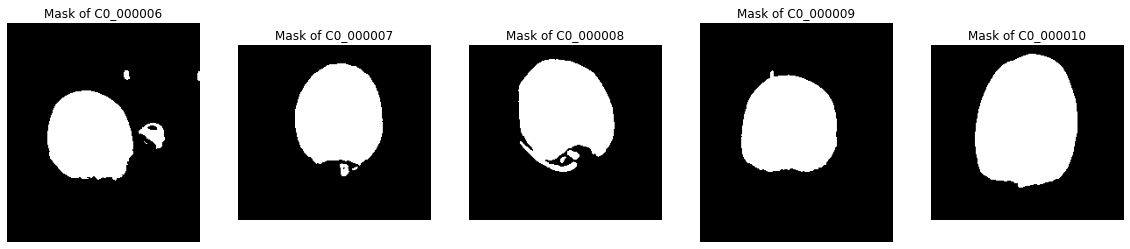

In [26]:
#Mask of the apples
#The image pair has little parallax, so a mask might be computed on one image and then applied on the other one.
mask = []
mask_c = []
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:
    mask_temp = holes[j] | otsu[j]
    mask.append(mask_temp)
    mask_c_temp = cv2.cvtColor(mask[j], cv2.COLOR_GRAY2RGB) 
    mask_c.append(mask_c_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Mask of C0_000010")
    else:
        plt.title("Mask of C0_00000{}".format(j+6))
    plt.imshow(mask[j], cmap='gray', vmin=0, vmax=255)
    j = j+1

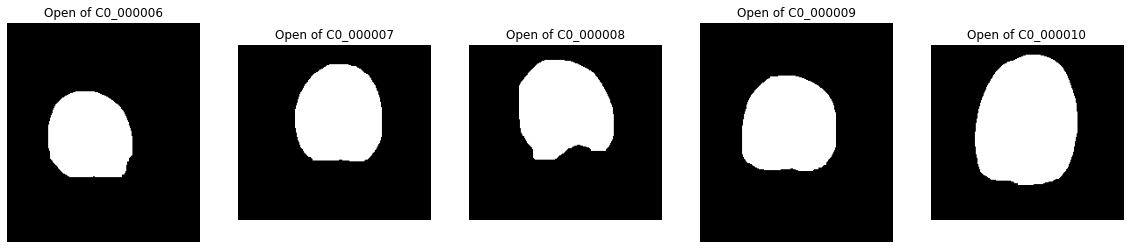

In [27]:
open=[]
open_c = []

open_ker=cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:  
    open_temp=cv2.morphologyEx(mask[j], cv2.MORPH_OPEN, open_ker)
    open.append(open_temp)
    open_c_temp=cv2.morphologyEx(mask_c[j], cv2.MORPH_OPEN, open_ker)
    open_c.append(open_c_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Open of C0_000010")
    else:
        plt.title("Open of C0_00000{}".format(j+6))
    plt.imshow(open[j], cmap='gray', vmin=0, vmax=255)
    j = j+1


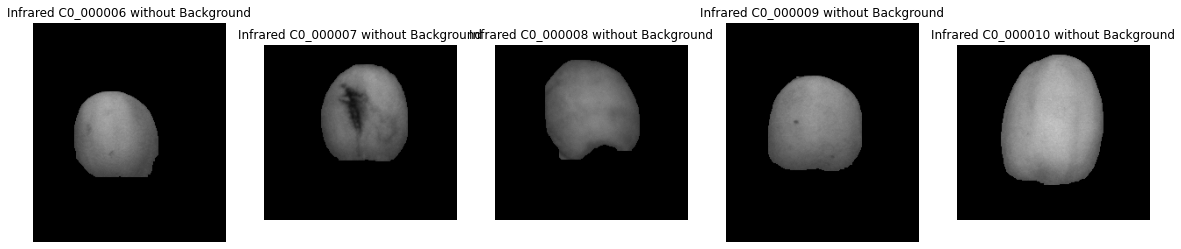

In [28]:
#Application of the masks to infrared images
app_nir = []
plt.figure(figsize=(20,5))
j = 0
for i in img_NIR:  
    app_nir_temp = i * (open[j]/255)
    app_nir.append(app_nir_temp)
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Infrared C0_000010 without Background")
    else:
        plt.title("Infrared C0_00000{} without Background".format(j+6))
    plt.imshow(app_nir[j], cmap='gray', vmin=0, vmax=255)
    j = j+1

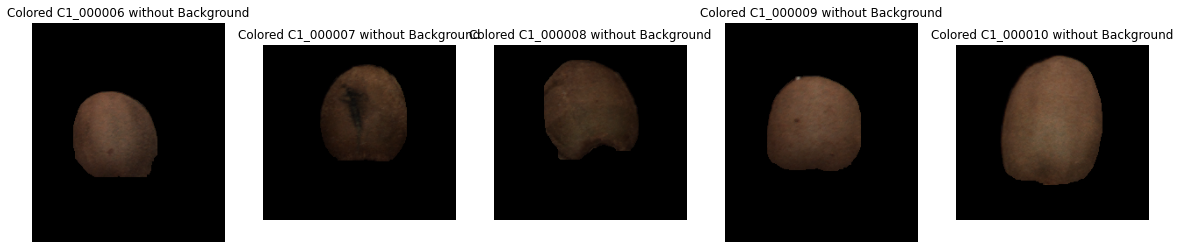

In [29]:
#Application of the masks to colored images
bool_mask = []
plt.figure(figsize=(20,5))
j = 0
for i in img_RGB:  
    ones = np.ones(i.shape, dtype=int)
    bool_mask_temp = ones & open_c[j]
    bool_mask.append(bool_mask_temp)
    #m_im1_c = cv2.bitwise_or(im1_c, mask1_c)
    #print(mask_c[j].shape)
    #print(i.shape)
    app_rgb = i * bool_mask[j]
    plt.subplot(1,5,j+1).axis("off")
    if j==4:
        plt.title("Colored C1_000010 without Background")
    else:
        plt.title("Colored C1_00000{} without Background".format(j+6))
    plt.imshow(app_rgb)
    #print(app_nir[j].shape)
    #print(app_rgb[j].shape)
    j = j+1

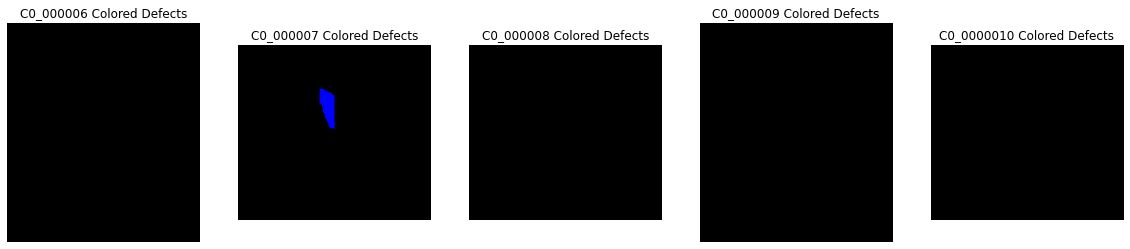

In [30]:
#Change of the color of the defects
#print("Holes")
j = 0
plt.figure(figsize=(20,5))

holes_col = []

for i in holes:
    i = i.astype(np.uint8)

    h_holes, w_holes = i.shape

    holes_col_temp = np.zeros((h_holes, w_holes, 3), np.uint8)
    holes_col_temp[:,:,2] = i + holes_col_temp[:,:,2]

    holes_col.append(holes_col_temp)

    plt.subplot(1,5,j+1).axis("off")
    plt.title("C0_00000{} Colored Defects".format(j+6))
    
    j = j+1
    
    plt.imshow(holes_col_temp)
plt.show()

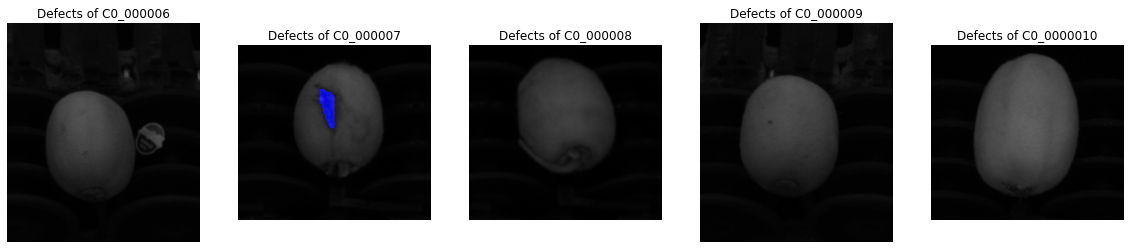

In [31]:
#Sovrapposition of highlighted defects onto the NIR images
#print("Blended")
j = 0
plt.figure(figsize=(20,5))

blended = []

for i in holes_col:
    i = np.array(i,np.uint8)

    blended_temp = cv2.addWeighted(img_NIR_RGB[j], 0.5, i, 0.8, 0)
    blended.append(blended_temp)

    plt.subplot(1,5,j+1).axis("off")
    plt.title("Defects of C0_00000{}".format(j+6))
    
    j = j+1
    
    plt.imshow(blended_temp)
plt.show()